# PYTHON LAPTOP ANALYSIS


##### PROBLEM STATMENT :
In today's competitive laptop market, understanding the key factors that influence laptop pricing is crucial for manufacturers and consumers. Various hardware specifications, such as CPU type, GPU, RAM, and screen size, contribute to price variations. However, the extent of their impact remains unclear. This analysis aims to uncover correlations between different laptop features and their pricing to help manufacturers optimize configurations and assist buyers in making informed decisions


##### OBJECTIVES: 
1) To analyze the relationship between laptop specifications (CPU, GPU, RAM, screen size, weight, etc.) and their prices.
2) To identify the most influential factors affecting laptop pricing.
3) To visualize and interpret correlations using Python data analysis techniques (e.g., Pandas, NumPy, Seaborn).
4) To provide insights that can guide manufacturers in pricing strategies and product development


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.DataFrame(pd.read_csv('laptop_price.csv', encoding='ISO-8859-1'))

In [6]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [8]:
df.info


<bound method DataFrame.info of       laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3       

In [9]:

df.shape

(1303, 13)

In [10]:
# finding whether there are any duplicates
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [11]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [12]:
df.describe(include = 'O')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


In [13]:
# we can see that the DELL Is the biggest company and has hightest market share  in market  
# The most used product type is the Notebook

In [14]:
df["Ram"]=df["Ram"].str.replace("GB","")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [15]:
df["Weight"]=df["Weight"].str.replace("kg","")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


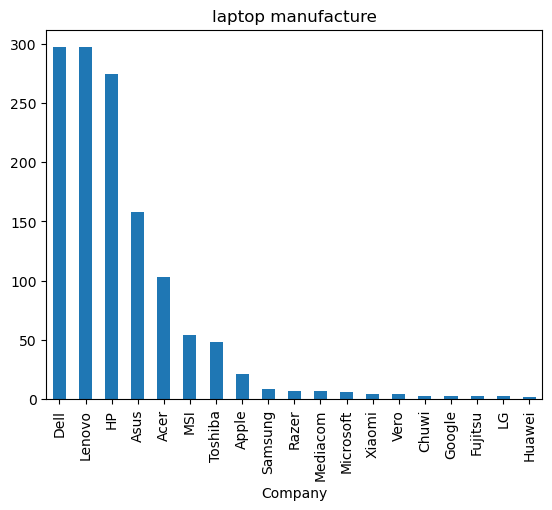

In [16]:
df["Company"].value_counts().plot(kind='bar',title="laptop manufacture")
plt.show()

In [17]:
df["Company"].value_counts()


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

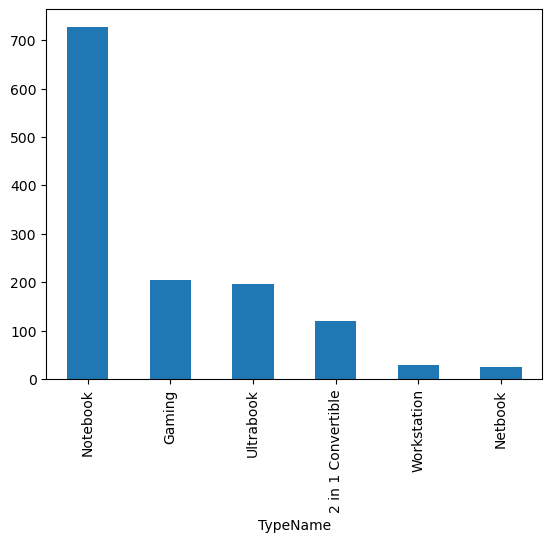

In [18]:
df["TypeName"].value_counts().plot(kind='bar')
plt.show()

In [19]:
df["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

<Axes: title={'center': 'screen size'}, xlabel='Inches'>

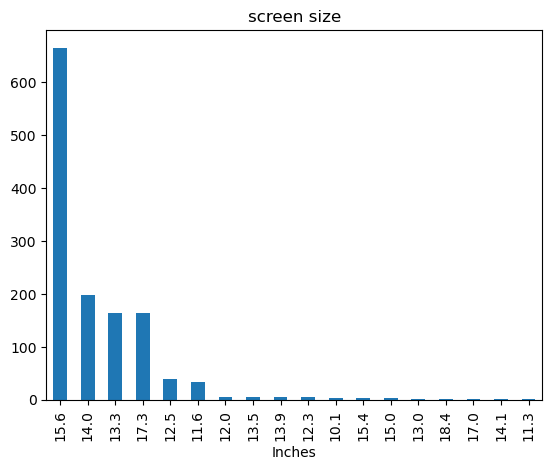

In [20]:
df["Inches"].value_counts().plot(kind='bar',title="screen size")

In [21]:
df["Inches"].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [22]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

<Axes: title={'center': 'the most sold & preferred os'}, xlabel='OpSys'>

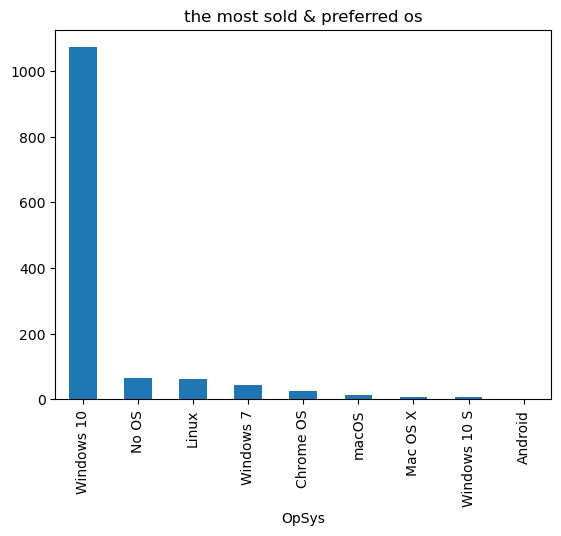

In [23]:
df["OpSys"].value_counts().plot(kind='bar',title="the most sold & preferred os")

In [24]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

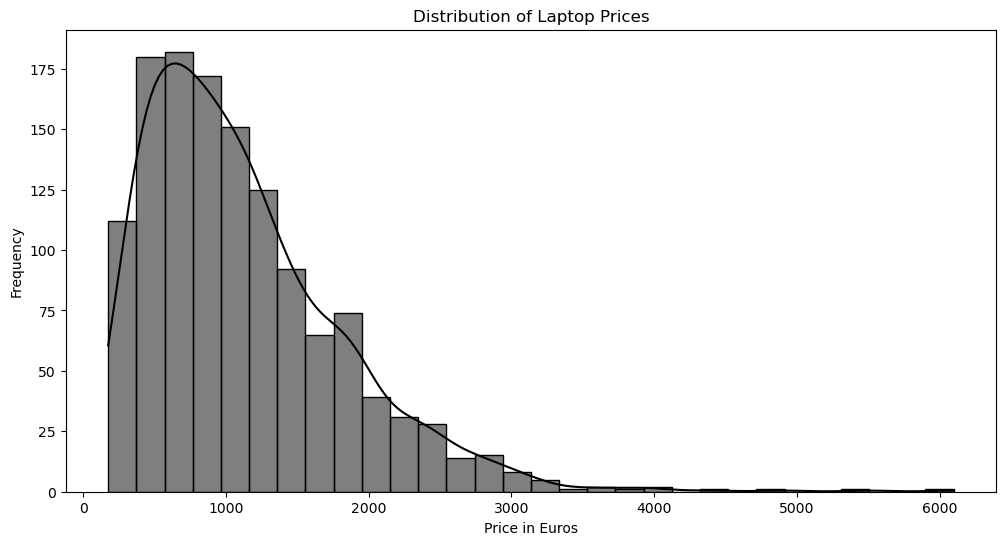

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Price_euros"], bins=30, kde=True, color="black")
plt.xlabel("Price in Euros")
plt.ylabel("Frequency")
plt.title("Distribution of Laptop Prices")
plt.show()

In [26]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


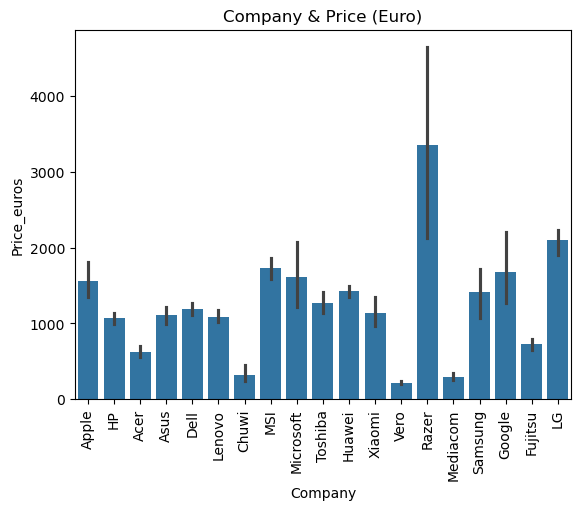

In [27]:
sns.barplot(x = df['Company'], y = df["Price_euros"])
plt.xticks(rotation='vertical')
plt.title('Company & Price (Euro)')
plt.show()

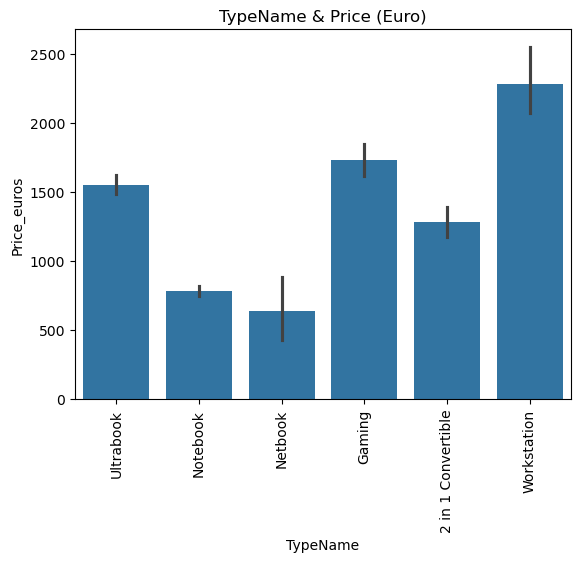

In [28]:
sns.barplot(x = df['TypeName'], y = df["Price_euros"])
plt.xticks(rotation='vertical')
plt.title('TypeName & Price (Euro)')
plt.show()

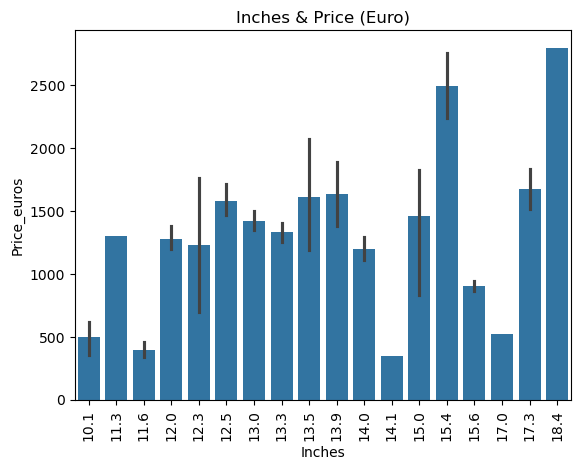

In [29]:
sns.barplot(x = df['Inches'], y = df["Price_euros"])
plt.xticks(rotation='vertical')
plt.title('Inches & Price (Euro)')
plt.show()

In [30]:
df.rename(columns={"Price_euros":"price"},inplace=True)

In [31]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


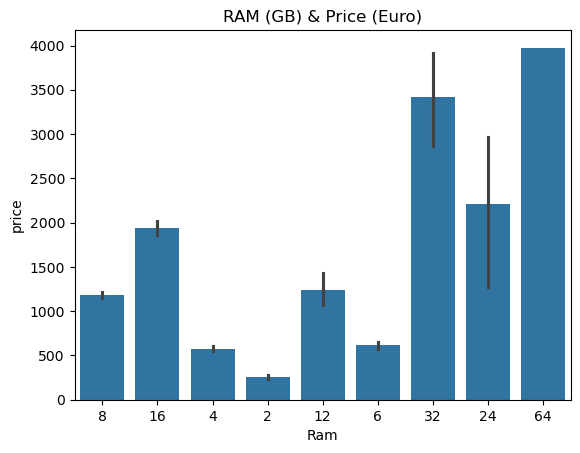

In [32]:
sns.barplot(x = df['Ram'], y = df['price'])
plt.xticks(rotation=0)
plt.title('RAM (GB) & Price (Euro)')
plt.show()

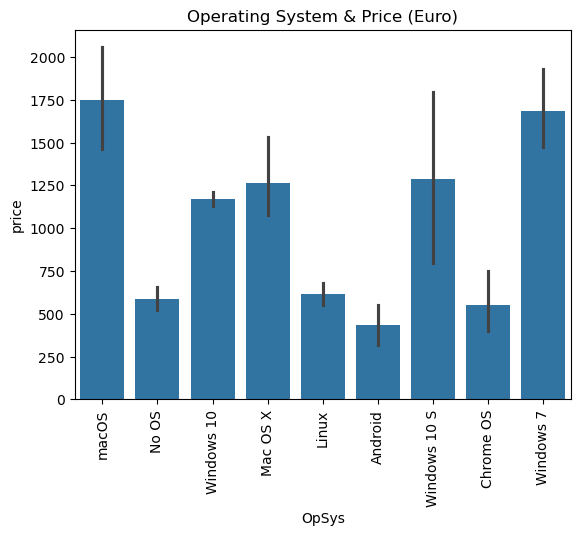

In [33]:
sns.barplot(x = df['OpSys'], y = df['price'])
plt.xticks(rotation='vertical')
plt.title('Operating System & Price (Euro)')
plt.show()

In [34]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# DATA PROCESSING

In [36]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [37]:
# Dropping 'Product' column
df = df.drop("Product", axis=1)
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [38]:
#encoding 'Company' column
df = df.join(pd.get_dummies(df.Company).astype(int))
df = df.drop("Company", axis=1)

In [39]:
 #encoding 'TypeName' column
df = df.join(pd.get_dummies(df.TypeName).astype(int))
df = df.drop("TypeName", axis=1)
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [40]:
# Splitting 'ScreenResolution' into width and height
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,0,0,0,0,0,0,1,0,2560,1600
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,...,0,0,0,0,0,0,1,0,1440,900
2,3,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,...,0,0,0,0,0,1,0,0,1920,1080
3,4,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,...,0,0,0,0,0,0,1,0,2880,1800
4,5,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,0,0,0,0,0,0,1,0,2560,1600


In [41]:
# Dropping 'ScreenResolution' column
df = df.drop("ScreenResolution", axis=1)

In [42]:
# Extracting 'CPU Brand Name' and 'CPU Frequency' from 'Cpu' column
df["CPU Brand Name"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df.head()

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Acer,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz
1,2,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,...,0,0,0,0,1,0,1440,900,Intel,1.8GHz
2,3,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5GHz
3,4,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,...,0,0,0,0,1,0,2880,1800,Intel,2.7GHz
4,5,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,...,0,0,0,0,1,0,2560,1600,Intel,3.1GHz


In [43]:
# Dropping 'Cpu' column
df = df.drop("Cpu", axis=1)

In [44]:
df["CPU Frequency"]=df["CPU Frequency"].str.replace("GHz","")
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,price,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [45]:
# Ensuring that all the values in 'Ram' column are treated as int
df['Ram'] = df['Ram'].astype(int)

In [46]:
# Ensuring that all values in 'CPU Frequency' column are treated as strings
df['CPU Frequency'] = df['CPU Frequency'].astype(float)

In [47]:
# Convert 'Screen Width' and 'Screen Height' to integer
df["Screen Width"] = df["Screen Width"].astype(int)
df["Screen Height"] = df["Screen Height"].astype(int)
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,price,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [48]:
# Splitting 'Memory' into amount and type
df["Memmory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memmory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])
df['Memmory Amount'].value_counts()

Memmory Amount
256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [49]:
# Function to convert memory amounts to MB
def memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000


In [50]:
# Apply function to 'Memmory Amount' column
df["Memmory Amount"] = df["Memmory Amount"].apply(memory_into_MB)
df = df.drop("Memory", axis=1)
df = df.drop("Memmory Type", axis=1)
df.head()

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,price,Acer,Apple,Asus,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency,Memmory Amount
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,...,0,0,0,1,0,2560,1600,Intel,2.3,128000.0
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,0,...,0,0,0,1,0,1440,900,Intel,1.8,128000.0
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,...,0,0,1,0,0,1920,1080,Intel,2.5,256000.0
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,...,0,0,0,1,0,2880,1800,Intel,2.7,512000.0
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,...,0,0,0,1,0,2560,1600,Intel,3.1,256000.0


In [51]:
 df['Weight'].astype(float)
df.head()


,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,price,Acer,Apple,Asus,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency,Memmory Amount
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,...,0,0,0,1,0,2560,1600,Intel,2.3,128000.0
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,0,...,0,0,0,1,0,1440,900,Intel,1.8,128000.0
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,...,0,0,1,0,0,1920,1080,Intel,2.5,256000.0
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,...,0,0,0,1,0,2880,1800,Intel,2.7,512000.0
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,...,0,0,0,1,0,2560,1600,Intel,3.1,256000.0


In [52]:
# Extracting 'GPU Brand' from 'Gpu' column
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

In [53]:
# One-hot encoding 'OpSys' column
df = df.join(pd.get_dummies(df.OpSys).astype(int))
df = df.drop("OpSys", axis=1)

In [54]:
df["CPU Brand Name"].value_counts()

CPU Brand Name
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [55]:
# encoding 'CPU Brand Name' column
cpu_ctg = pd.get_dummies(df['CPU Brand Name'])
cpu_ctg.columns = [col + '_CPU' for col in cpu_ctg.columns]
cpu_ctg = cpu_ctg.astype(int)
df = df.join(cpu_ctg)
df = df.drop("CPU Brand Name", axis=1)

In [56]:
df = df.drop("Samsung_CPU", axis=1)

In [57]:
df.head()

,laptop_ID,Inches,Ram,Weight,price,Acer,Apple,Asus,Chuwi,Dell,...,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [58]:
df["GPU Brand"].value_counts()

GPU Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [59]:
#encoding 'GPU Brand' column
gpu_ctg = pd.get_dummies(df['GPU Brand'])
gpu_ctg.columns = [col + '_GPU' for col in gpu_ctg.columns]
gpu_ctg = gpu_ctg.astype(int)
df = df.join(gpu_ctg)
df = df.drop("GPU Brand", axis=1)

In [60]:
df = df.drop('ARM_GPU', axis=1)

In [61]:
df.head()

,laptop_ID,Inches,Ram,Weight,price,Acer,Apple,Asus,Chuwi,Dell,...,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,AMD_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [62]:
# Dropping 'laptop id' column
df = df.drop('laptop_ID', axis=1)

In [63]:
df.info

<bound method DataFrame.info of       Inches  Ram Weight    price  Acer  Apple  Asus  Chuwi  Dell  Fujitsu  \
0       13.3    8   1.37  1339.69     0      1     0      0     0        0   
1       13.3    8   1.34   898.94     0      1     0      0     0        0   
2       15.6    8   1.86   575.00     0      0     0      0     0        0   
3       15.4   16   1.83  2537.45     0      1     0      0     0        0   
4       13.3    8   1.37  1803.60     0      1     0      0     0        0   
...      ...  ...    ...      ...   ...    ...   ...    ...   ...      ...   
1298    14.0    4    1.8   638.00     0      0     0      0     0        0   
1299    13.3   16    1.3  1499.00     0      0     0      0     0        0   
1300    14.0    2    1.5   229.00     0      0     0      0     0        0   
1301    15.6    6   2.19   764.00     0      0     0      0     0        0   
1302    15.6    4    2.2   369.00     0      0     1      0     0        0   

      ...  No OS  Windows 10  W

# Boxplts

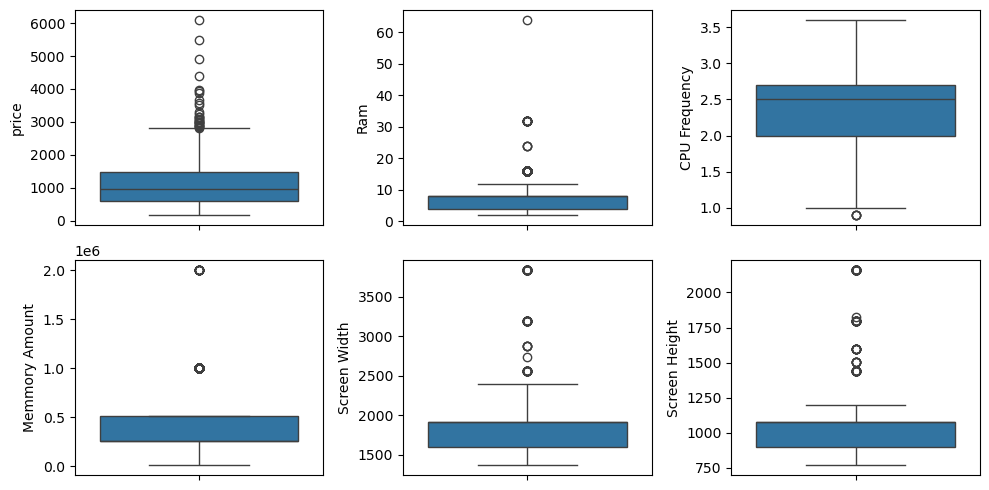

In [65]:
fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(df["price"],ax=axs[0,0])
plt2=sns.boxplot(df["Ram"],ax=axs[0,1])
plt3=sns.boxplot(df["CPU Frequency"],ax=axs[0,2])
plt1=sns.boxplot(df["Memmory Amount"],ax=axs[1,0])
plt2=sns.boxplot(df["Screen Width"],ax=axs[1,1])
plt3=sns.boxplot(df["Screen Height"],ax=axs[1,2])
plt.tight_layout()

num of outliers: 1274


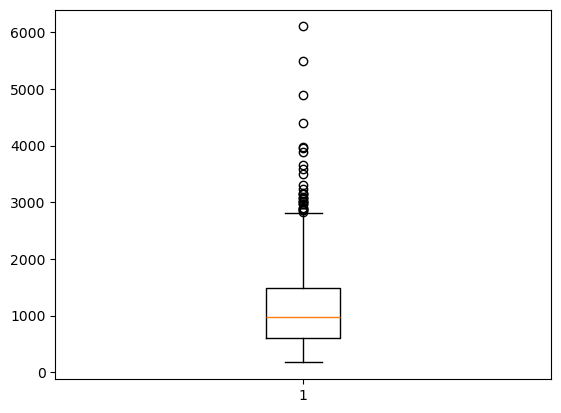

In [66]:
plt.boxplot(df.price)
Q1=df.price.quantile(0.25)
Q3=df.price.quantile(0.75)
IQR=Q3-Q1
OUT=df[(df.price>=Q1-1.5*IQR)&(df.price<=Q3+1.5*IQR)]
num_outlier=len(OUT)
print("num of outliers:",num_outlier)

In [67]:
price="price"
Q1=df.price.quantile(0.25)
Q3=df.price.quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
outliers=df[(df[price]<LB)|(df[price]>UB)]
outlier_count=outliers.shape[0]
print("NO of rows with outliers:",outlier_count)
print("rowns with outliers")
print(outliers)

NO of rows with outliers: 29
rowns with outliers
      Inches  Ram Weight    price  Acer  Apple  Asus  Chuwi  Dell  Fujitsu  \
17      15.4   16   1.83  2858.00     0      1     0      0     0        0   
190     14.0   16   1.42  2824.00     0      0     0      0     0        0   
196     17.3   32   3.49  6099.00     0      0     0      0     0        0   
204     15.6   16    2.8  3055.00     0      0     0      0     1        0   
238     17.3   32    4.7  3890.00     0      0     1      0     0        0   
247     17.3   16    3.6  2999.00     0      0     1      0     0        0   
297     17.3   16   3.42  2884.86     0      0     0      0     1        0   
517     15.6   24   2.24  2968.00     0      0     1      0     0        0   
530     17.3   16   4.42  3012.77     0      0     0      0     1        0   
563     17.3    8    3.4  2999.00     0      0     0      0     0        0   
610     15.6   32    2.5  4899.00     0      0     0      0     0        0   
659     17.3   

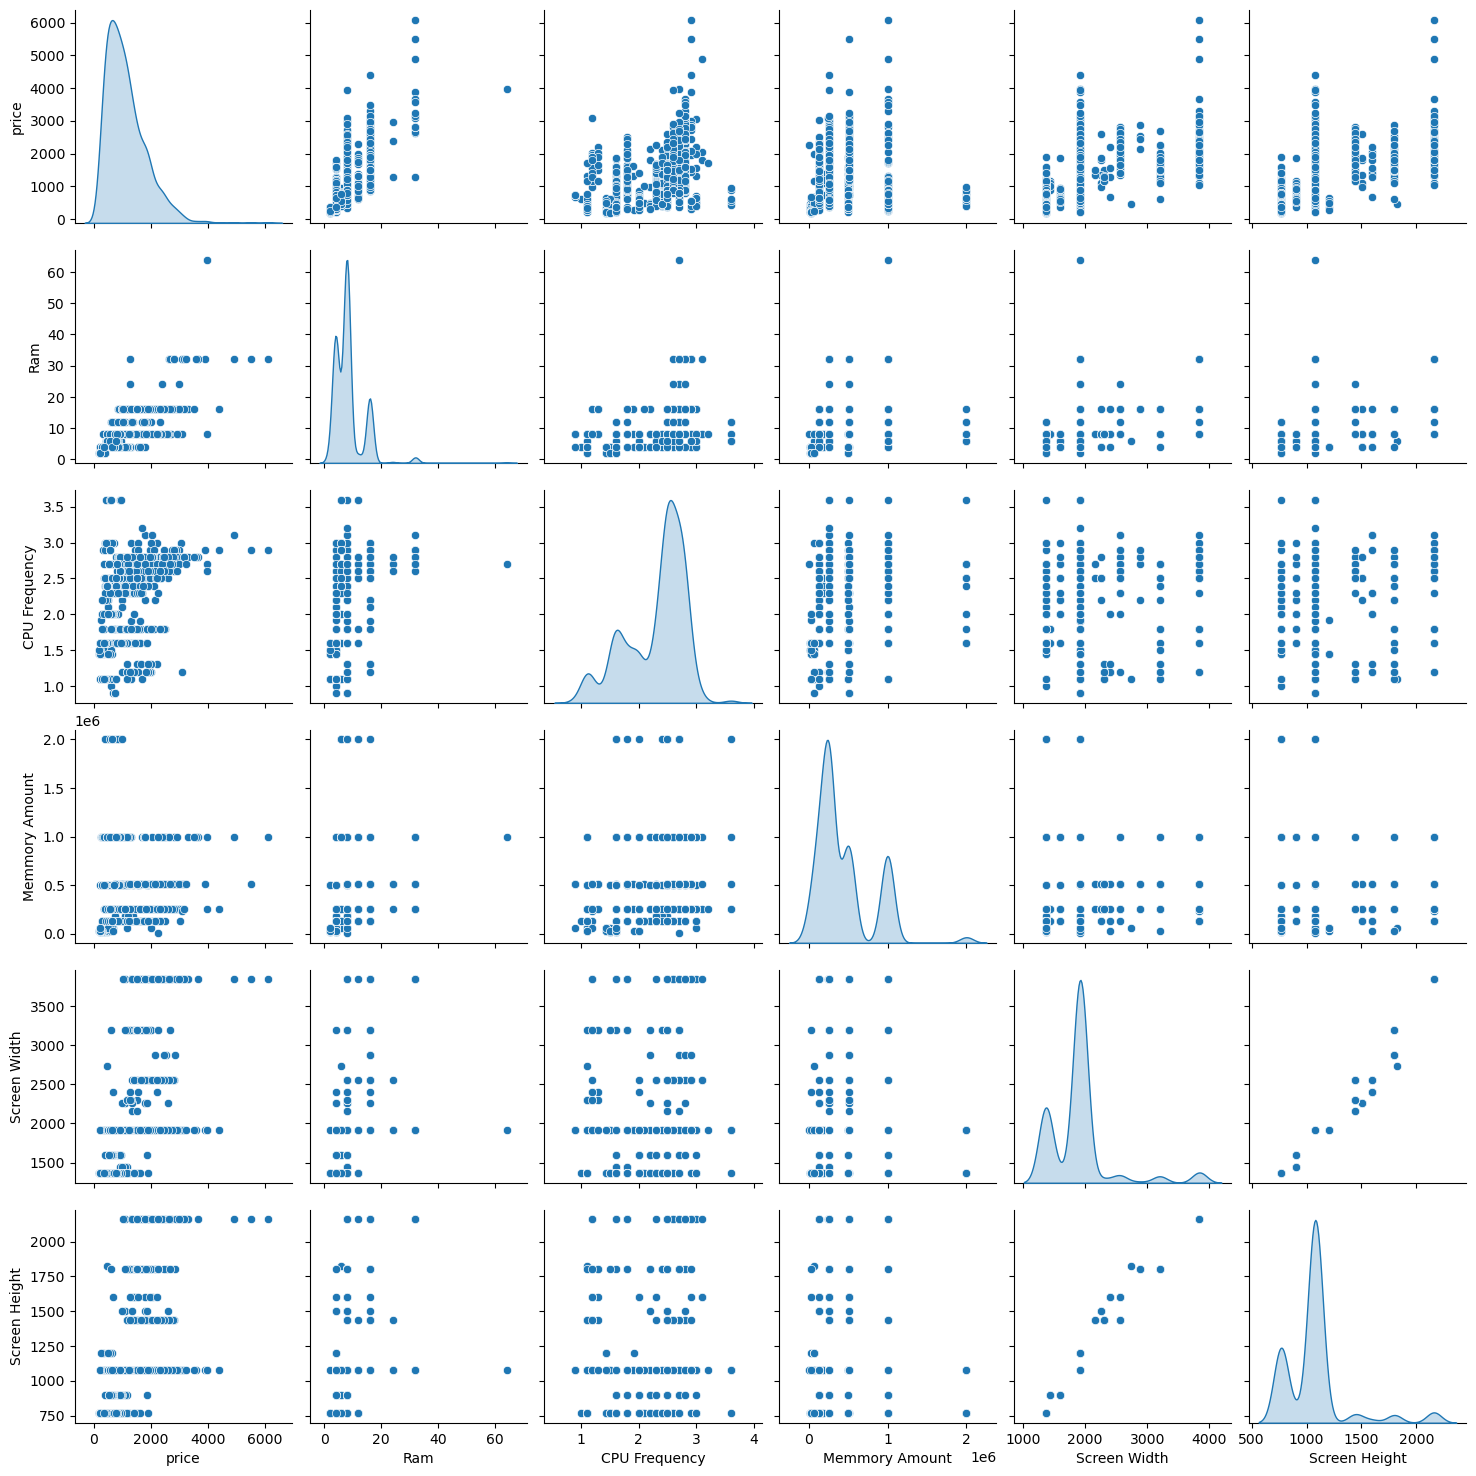

In [68]:
# Selecting important numerical variables
important_vars = ["price", "Ram", "CPU Frequency", "Memmory Amount", "Screen Width", "Screen Height"]

# Creating the pairplot
sns.pairplot(df[important_vars], diag_kind='kde')  # KDE for better distribution view
plt.show()


In [69]:
df.head()

,Inches,Ram,Weight,price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,AMD_GPU,Intel_GPU,Nvidia_GPU
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,13.3,8,1.34,898.94,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,15.6,8,1.86,575.00,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


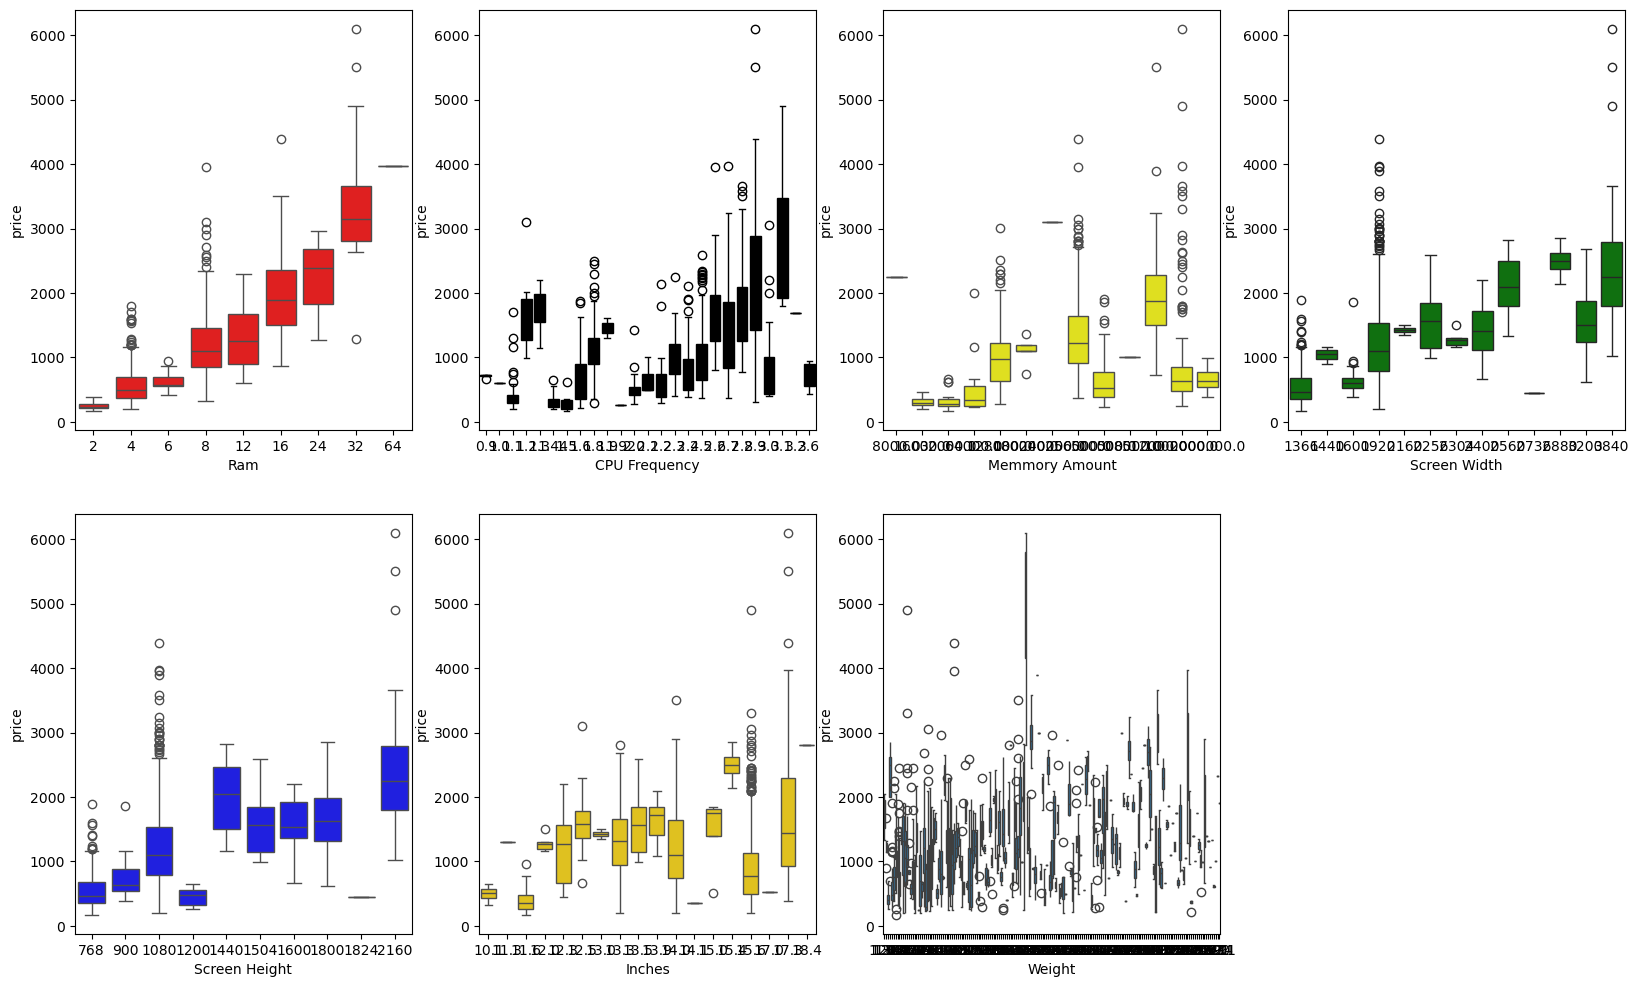

In [70]:
# y is depentendent  
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="Ram",y="price",data=df,color="red")
plt.subplot(2,4,2)
sns.boxplot(x="CPU Frequency",y="price",data=df,color="black")
plt.subplot(2,4,3)
sns.boxplot(x="Memmory Amount",y="price",data=df,color="yellow")
plt.subplot(2,4,4)
sns.boxplot(x="Screen Width",y="price",data=df,color="green")
plt.subplot(2,4,5)
sns.boxplot(x="Screen Height",y="price",data=df,color="blue")
plt.subplot(2,4,6)
sns.boxplot(x="Inches",y="price",data=df,color="gold")
plt.subplot(2,4,7)
sns.boxplot(x="Weight",y="price",data=df)
plt.show()

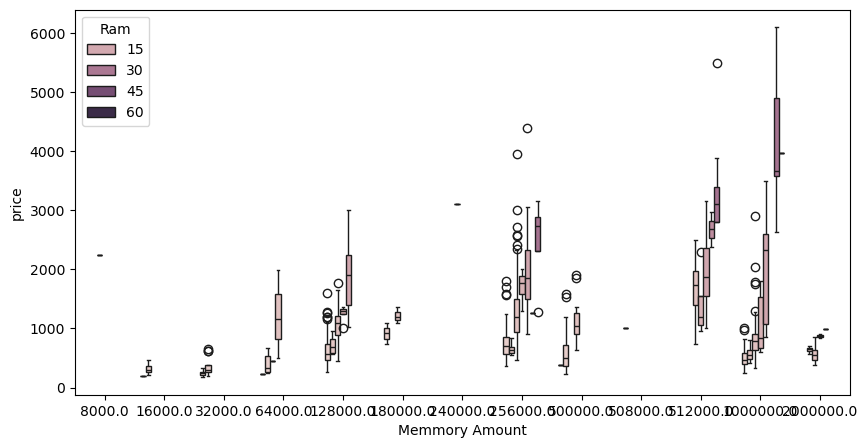

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Memmory Amount",y="price",hue="Ram",data=df)
plt.show()
        

In [72]:
# Selecting top 20 features based on correlation with target
target_cor = df.corr()['price'].apply(abs).sort_values()
selected_features = target_cor[-16:].index
selected_features = list(selected_features)
ltd_df = df[selected_features]
ltd_df.head()

,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Razer,Workstation,Ultrabook,Nvidia_GPU,Gaming,CPU Frequency,Notebook,Screen Height,Screen Width,Ram,price
0,1,1,0,0,1.37,0,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,1,1,0,0,1.34,0,0,1,0,0,1.8,0,900,1440,8,898.94
2,1,1,0,0,1.86,0,0,0,0,0,2.5,1,1080,1920,8,575.00
3,1,0,1,0,1.83,0,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,1,1,0,0,1.37,0,0,1,0,0,3.1,0,1600,2560,8,1803.60


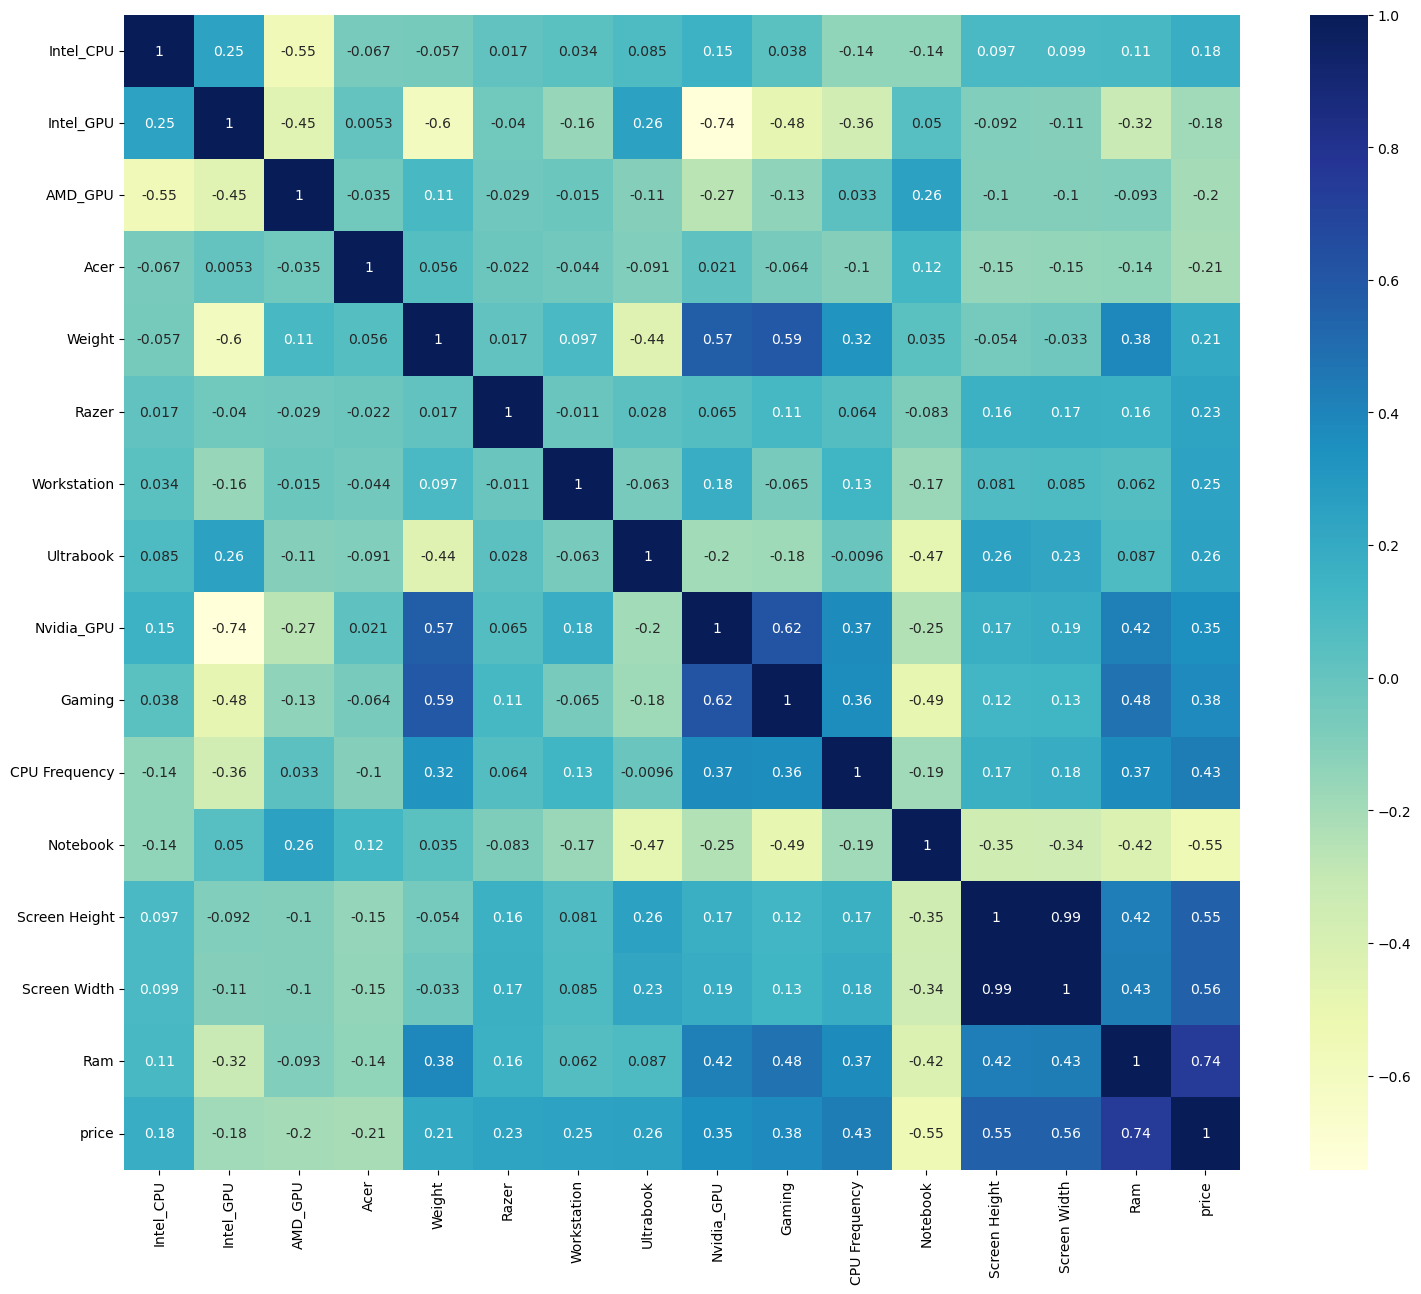

In [73]:
# Heatmap of selected features
plt.figure(figsize=(18, 15))
sns.heatmap(ltd_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [266]:
# Strong Positive Correlations (Dark Blue)
#RAM vs Price (+0.74) → Most influential factor on price. More RAM - Higher price.
#Screen Width (+0.56) & Screen Height (+0.55) vs Price - Larger screens mean higher prices.
#CPU Frequency vs Price (+0.43) - Faster processors = More expensive.
#Nvidia GPU vs Price (+0.35) - Laptops with Nvidia GPUs are generally premium-priced.
#Gaming Laptops vs Price (+0.38) -Gaming laptops are costlier.
 #Weak Correlations (Light Yellow)
#Workstation vs Price (+0.25) - Slight price increase for workstation models.
#Ultrabook vs Price (+0.25) - Ultrabooks are often expensive, but correlation isn’t very strong.
#Weight vs Price (-0.21) -Heavier laptops tend to be slightly cheaper.
 #Strong Negative Correlations (Dark Green)
#Notebook vs Price (-0.55) - Standard notebooks tend to be cheaper.
#Intel GPU vs Price (-0.18) - Laptops with integrated Intel GPUs are usually budget-friendly.
#AMD GPU vs Price (-0.20) - AMD GPUs don’t strongly drive price up like Nvidia GPUs.

In [268]:
#droping lap brand

In [75]:
df = df.drop("Huawei", axis=1)
df = df.drop("LG", axis=1)
df = df.drop("Fujitsu", axis=1)
df = df.drop("Google", axis=1)
df = df.drop("Chuwi", axis=1)

In [76]:
#droping lap os less prefered brand that sold less

In [77]:
df = df.drop("Android", axis=1)
df = df.drop("Windows 10 S", axis=1)
df = df.drop("Mac OS X", axis=1)
df = df.drop("macOS", axis=1)


In [78]:
df.describe()

,Inches,Ram,price,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,...,Chrome OS,Linux,No OS,Windows 10,Windows 7,AMD_CPU,Intel_CPU,AMD_GPU,Intel_GPU,Nvidia_GPU
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,...,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,1123.686992,0.079048,0.016117,0.121259,0.227936,0.210284,0.227936,0.041443,...,0.020721,0.047583,0.050652,0.822717,0.034536,0.047583,0.951650,0.138143,0.554106,0.306984
std,1.426304,5.084665,699.009043,0.269918,0.125973,0.326553,0.419662,0.407667,0.419662,0.199389,...,0.142505,0.212963,0.219371,0.382055,0.182671,0.212963,0.214587,0.345182,0.497255,0.461420
min,10.100000,2.000000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,15.600000,8.000000,1487.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,18.400000,64.000000,6099.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# spliting the data into training and testing model

In [80]:
df.head()

,Inches,Ram,Weight,price,Acer,Apple,Asus,Dell,HP,Lenovo,...,Chrome OS,Linux,No OS,Windows 10,Windows 7,AMD_CPU,Intel_CPU,AMD_GPU,Intel_GPU,Nvidia_GPU
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,13.3,8,1.34,898.94,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,15.6,8,1.86,575.00,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3)

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
 scaler=MinMaxScaler()

In [85]:
num_vars=["Inches","Ram","Weight","price","Screen Width","Screen Height","CPU Frequency","Memmory Amount"]

In [86]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [87]:
df_train.head()

,Inches,Ram,Weight,price,Acer,Apple,Asus,Dell,HP,Lenovo,...,Chrome OS,Linux,No OS,Windows 10,Windows 7,AMD_CPU,Intel_CPU,AMD_GPU,Intel_GPU,Nvidia_GPU
224,0.867470,0.225806,0.930175,0.385205,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
595,0.662651,0.096774,0.399002,0.048101,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
287,0.662651,0.096774,0.251870,0.135527,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
959,0.180723,0.032258,0.139651,0.036287,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
472,0.265060,0.096774,0.102244,0.185823,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [88]:
df_train.describe()

,Inches,Ram,Weight,price,Acer,Apple,Asus,Dell,HP,Lenovo,...,Chrome OS,Linux,No OS,Windows 10,Windows 7,AMD_CPU,Intel_CPU,AMD_GPU,Intel_GPU,Nvidia_GPU
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,0.593638,0.103389,0.339979,0.162090,0.087719,0.017544,0.117325,0.217105,0.210526,0.231360,...,0.021930,0.050439,0.049342,0.816886,0.036184,0.048246,0.951754,0.131579,0.557018,0.311404
std,0.172904,0.086064,0.173418,0.122995,0.283041,0.131358,0.321983,0.412501,0.407906,0.421933,...,0.146535,0.218968,0.216700,0.386972,0.186851,0.214402,0.214402,0.338218,0.497011,0.463321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469880,0.032258,0.201995,0.070042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.662651,0.096774,0.336658,0.135865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.662651,0.096774,0.403990,0.223629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model building

In [90]:
#dividing into x & y sets for model building
# y is target/dependent variable 
#x is features/independent variable 

In [91]:
y_train=df_train.pop("price")
x_train=df_train



In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [94]:
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [95]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))
#these show the important target variable

[('Inches', True, 1),
 ('Ram', True, 1),
 ('Weight', True, 1),
 ('Acer', False, 6),
 ('Apple', False, 7),
 ('Asus', False, 12),
 ('Dell', False, 15),
 ('HP', False, 22),
 ('Lenovo', False, 19),
 ('MSI', False, 2),
 ('Mediacom', False, 3),
 ('Microsoft', True, 1),
 ('Razer', True, 1),
 ('Samsung', False, 17),
 ('Toshiba', True, 1),
 ('Vero', False, 5),
 ('Xiaomi', False, 14),
 ('2 in 1 Convertible', False, 20),
 ('Gaming', True, 1),
 ('Netbook', True, 1),
 ('Notebook', True, 1),
 ('Ultrabook', False, 11),
 ('Workstation', True, 1),
 ('Screen Width', True, 1),
 ('Screen Height', False, 18),
 ('CPU Frequency', True, 1),
 ('Memmory Amount', True, 1),
 ('Chrome OS', False, 13),
 ('Linux', False, 9),
 ('No OS', False, 4),
 ('Windows 10', False, 21),
 ('Windows 7', True, 1),
 ('AMD_CPU', False, 8),
 ('Intel_CPU', True, 1),
 ('AMD_GPU', False, 10),
 ('Intel_GPU', False, 16),
 ('Nvidia_GPU', False, 23)]

In [96]:
col=x_train.columns[rfe.support_]
col

Index(['Inches', 'Ram', 'Weight', 'Microsoft', 'Razer', 'Toshiba', 'Gaming',
       'Netbook', 'Notebook', 'Workstation', 'Screen Width', 'CPU Frequency',
       'Memmory Amount', 'Windows 7', 'Intel_CPU'],
      dtype='object')

In [97]:
#hypothsis
#H1: RAM capacity has a significant impact on laptop price.
#H2: Weight has a significant impact on laptop price.
#H3: Acer brand has a significant negative impact on laptop price.
#H4: Mediacom brand does not have a significant impact on laptop price.
#H5: Razer brand has a significant positive impact on laptop price.
#H6: Vero brand does not have a significant impact on laptop price.
#H7: Gaming laptops have a significant negative impact on laptop price.
#H8: Notebook laptops have a significant negative impact on laptop price.
#H9: Workstation laptops have a significant positive impact on laptop price.
#H10: Screen height has a significant impact on laptop price.
#H11: CPU frequency has a significant impact on laptop price.
#H12: Memory capacity (RAM) has a significant negative impact on laptop price.
#H13: No operating system has a significant negative impact on laptop price.
#H14: Windows 7 has a significant positive impact on laptop price.
#H15: Intel processors have a significant positive impact on laptop price.


# model building using stats model for the detailed stats

In [99]:
x_train_rfe=x_train[col]

In [100]:


  import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)

In [101]:
#ols= ordinary least square  
lm=sm.OLS(y_train,x_train_rfe).fit()

In [102]:
#summary of linear model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     212.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          1.63e-282
Time:                        23:55:40   Log-Likelihood:                 1309.2
No. Observations:                 912   AIC:                            -2586.
Df Residuals:                     896   BIC:                            -2509.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0022      0.014     -0.

In [103]:
#interpretation
# The above table shows the result of linear regression model.In this model laptop price is corsidered as endogenios variable/ dep variable 
# exogenous variable/indepdent variable are "Gaming","Weight","Notebook","Ram","Screen Height", "CPU Frequency" ,"Workstation","Memmory Amount","Acer","Intel_CPU","No OS","Windows 7","Razer","Vero","Mediacom" are considered after the RFE.
#The overall model explained by rsquare that is coeffiecent of determination(r2=0.769) which indicates changes in the laptop price is explained by changes in "Gaming","Weight","Notebook","Ram","Screen Height", "CPU Frequency" ,"Workstation","Memmory Amount","Acer","Intel_CPU","No OS","Windows 7","Razer","Vero","Mediacom"  
#in other words the overall model is predicted by 76.9%.
# the remaining 23.1% is explained by someother variables which has not been considered in this Linear model,
# A high F statastics suggest that atleast one of the independent variable significantly explains the variasion in the price.
# the probability value of F statistics(F=196.6,p< that 0.01)
# confirming that the model is statistically 
# the beta coeffiecernt indicate the impact level of each indpendent variable on the dependent variable in the estimated model.
#Variable	Beta Coefficient (coef)	Interpretation :
#Constant (Intercept)	-0.0619	Base price when all variables are zero
#Inches	-0.1297	For each additional inch, price decreases by 0.1297 units
#Ram	0.8023	For each extra GB of RAM, price increases by 0.8023 units
#Weight	0.1495	For each additional kg of weight, price increases by 0.1495 units
#Mediacom	-0.0589	Being a Mediacom brand decreases price by 0.0589 units
#Razer	0.1280	Being a Razer brand increases price by 0.1280 units
#Vero	-0.0516	Being a Vero brand decreases price by 0.0516 units
#Ultrabook	0.0545	Being an Ultrabook increases price by 0.0545 units
#Workstation	0.1223	Being a Workstation increases price by 0.1223 units
#Screen Width	-0.2374	Wider screens decrease price by 0.2374 units
#Screen Height	0.3561	Higher screen resolution increases price by 0.3561 units
#CPU Frequency	0.1204	Faster CPU (GHz) increases price by 0.1204 units
#Memory Amount	-0.0468	More storage (Memory) decreases price by 0.0468 units
#Windows 10	0.0381	Having Windows 10 increases price by 0.0381 units
#Windows 7	0.0914	Having Windows 7 increases price by 0.0914 units
#Intel CPU	0.0604	Having an Intel CPU increases price by 0.0604 units
#Acceptance and rejection of hypothesis
#Accepted Hypotheses : 
#(Significant impact on price for variable such as  Inches, RAM, Weight, Mediacom, Razer, Ultrabook, Workstation, Screen Width, Screen Height, CPU Frequency, Memory Amount, Windows 10, Windows 7, Intel CPU
#Rejected Hypothesis: (No significant impact on price): Vero

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# variance inflation factor- is the one of the criteria to cheak multi collenearity
# multi collenearity- when 2 independent variable are highly correlated(the percent should 80% or 70%)
# if any independent variable is greater that 10 there will bw problem of multi collenearity

In [106]:
vif=pd.DataFrame()
X=x_train_rfe
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,features,VIF
0,const,55.42
3,Weight,4.84
1,Inches,4.47
7,Gaming,3.25
9,Notebook,2.69
2,Ram,1.92
11,Screen Width,1.41
12,CPU Frequency,1.38
10,Workstation,1.26
13,Memmory Amount,1.21


In [107]:
# the above results shows the estimation of multi collenearity one of key creteria to cheak multi collenearity is VIF.
# It is evidance that the VIF of all the independent variable are less that 10 which indicates there is no problem of multi collenaerity in the estimated model

# residual is the error


In [109]:
 #error = act - est
 #now to cheak if the error terms are also normally distibuted(which is infact one of major assumtion of linear regression),let us plot the histogrm of the error term and see what is look like 

In [110]:
y_train_price=lm.predict(x_train_rfe)

In [111]:
#y_train_price is predicted,y_train is actual

In [112]:
res=(y_train_price-y_train)

In [113]:
#importing the requried library for plots 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [114]:
#plot the histogram of the error term 

<Figure size 640x480 with 0 Axes>

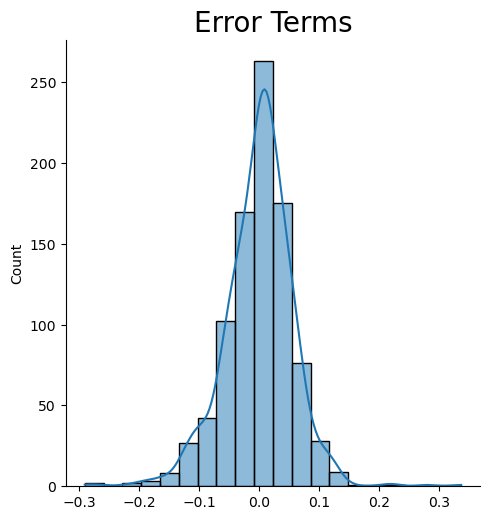

In [115]:
fig=plt.figure()
sns.displot((res),bins=20,kde=True)
plt.title("Error Terms",fontsize=20)
plt.show()

In [116]:
# one of the assumption of regression model is residual analysis the above histogram displays the error terms of laptop price(actual-estimated).
# it is observed that the error term are normally distibuted.

# Model Evaluation

In [118]:
# applying the scaling on the test  

In [119]:
num_vars=["price","Gaming","Weight","Notebook","Ram","Screen Height", "CPU Frequency" ,"Workstation","Memmory Amount","Acer","Intel_CPU","No OS","Windows 7","Razer","Vero","Mediacom"	]

In [120]:
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [121]:
# dividing into x test and y test 

In [122]:
y_test=df_test.pop(price)
x_test=df_test

In [123]:
# adding constant variable to test DataFrame 

In [124]:
x_test=sm.add_constant(x_test)

In [125]:
# Now lets use our model to make prediction 
# creating x_test_new dataframe by droping variables from x_test

In [126]:
x_test_rfe=x_test[x_train_rfe.columns]

In [127]:
# using this code for making prediction

In [128]:
y_pred=lm.predict(x_test_rfe)

In [129]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-3143887.6759700864

In [130]:
# ploting y_test and y_predict to understatnd the spread

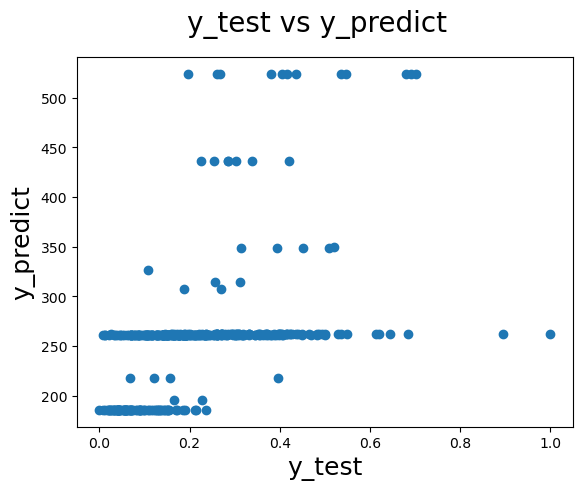

In [131]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_predict",fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_predict",fontsize=18)
plt.show()

In [132]:
#the above graph tells us about the acutal vs predicted 